## Aprendizaje automático
---



Integrantes: +Sigrid Segura +Víctor Garro Abarca


---



Resumen: En este trabajo se seleccionará un conjunto de datos (dataset) de alguna de las fuentes propuestas en clase, o bien de algún repositorio que considere oportuno. Se llevarán a cabo diferentes tareas de aprendizaje automático (tipo benchmark) y se hará un análisis de los resultados y estrategia de diseño de los diferentes experimentos propuestos.


---



# Métodos y caracteŕisticas

Los métodos de ensamble de modelos o métodos combinados intentan ayudar a mejorar el rendimiento de los modelos de Machine Learning al mejorar su precisión. Este es un proceso mediante el cual se construyen estratégicamente varios modelos de Machine Learning para resolver un problema particular.

En ese sentido, los métodos de ensamble de modelos son técnicas que crean múltiples modelos y luego los combinan para producir mejores resultados. Los métodos de conjunto generalmente producen soluciones más precisas que las que produciría un solo modelo. Este ha sido el caso en varios concursos de aprendizaje automático, donde las soluciones ganadoras utilizaron métodos de conjunto. Algunos ejemplos:

* ## Agregación de Bootstrap
también conocida como embolsado que involucra un conjunto de árboles de decisión.

* ## Generalización apilada(Stacked Generalization)
Es un método de conjunto también conocido como apilamiento o combinación que aprende cómo combinar mejor las predicciones de múltiples modelos.

* ## Random Forest
El algoritmo Random Forest, tiene como objetivo mejorar esa reducción de varianza a trav ́es de construir  ́arboles de clasificaci ́on menos correlados entre ellos. A diferencia de los m ́etodos vistos hasta ahora, donde los modelos base h pod ́ıan pertenecer a cualquier familia, Random Forest está diseñado para ser utilizado  ́unicamente con  ́arboles de decisión.
Kernel SVM. Es una extensión de embolsado que da como resultado un entrenamiento más rápido y un mejor rendimiento.

Otros métodos y modelos de los vistos, podemos entontrar

* ## kNN
El algoritmo K-Nearest Neighbors, también llamado KNN, es uno de los más populares para el reconocimiento de patrones y correlaciones. Su uso lo podemos encontrar por ejemplo en modelado financiero para prever cómo estarán los mercados, para detección de spam, o también en el campo de la medicina para saber si un paciente que ha ingresado por un infarto al corazón es probable que sufra otro atendiendo a su historial médico

* ## Naive Bayes
El clasificador Naive Bayes es muy utilizado y da grandes resultados cuando se usa para clasificación y análisis de texto. Este teorema funciona utilizando la probabilidad condicionada o la probabilidad de que algo pase teniendo conocimiento de lo que ha ocurrido previamente. Así podremos calcular la probabilidad con la que va a ocurrir algo basándonos en la probabilidad condicional.

* ## Desición Trees
Si hay algo que bien podemos destacar de este tipo de algoritmos y la visualización de su efectividad es por sus reglas de clasificación fácilmente comprensibles para los humanos. La idea viene a través de la conocida estructura de los árboles donde podemos encontrar una raíz y unos nodos, donde veremos sus respectivas ramas y las hojas. Un árbol de decisión empieza por el nodo raíz y se despliega hacia abajo en dos o más ramas de izquierda a
derecha. El nodo donde termina la cadena es el que llamaremos nodo hoja.
La interpretación de un árbol de decisión sería de la siguiente forma: cada nodo
intermedio del árbol lo vamos a considerar como un atributo o característica de los datos a tratar, siendo el nodo raíz aquel atributo más relevante, y cada hoja corresponderá con una clase o etiqueta.

Bibliografía consultada: Zamorano, J. (2018). Comparativa y análisis de algoritmos de aprendizaje automático para la predicción. 

#ANALISIS del ARBOL DE DECISION SAO-PAULO-PROPERTIES


In [ ]:
#Se cargan librerias

import torch as torch
import pandas as pd
import numpy as np

In [ ]:
def read_dataset(csv_name = 'https://github.com/mathdeoliveira/files/blob/master/sao-paulo-properties-april-2019.csv?raw=true'):
    """
    Reads a csv dataset 
    returns it as a pytorch tensor
    """
    data_frame = pd.read_csv(csv_name)
   
    #Preprocesado y retorno de matriz de torch con los tarjets
    
    '''Se discretiza la variable "Price" del dataset, se generan 4 categorias de precio de la siguiente manera:
    1) 900000 < Price --> categoría 4,
    2) 580000 < Price < 900000----> categoría 3
    3) 400000 < Price < 580000 ----> categoría 2
    4) Price < 400000 ----> categoría 1'''
    
    bins= [0,400001,580001,900001,10000001] #10000001 representa el valor maximo del precio+1 
    #Se genera la categoria como valor y no como string para que no de problema la conversion a tensor
    labels = [1,2,3,4]
    data_frame['y'] = pd.cut(data_frame['Price'], bins=bins, labels=labels, right=False)
   
    #se dejan unicamente los siguientes atributos numéricos: Rooms, Size, Toilets y Parking y la columna "y"
    data_frame=data_frame.filter(items=['Rooms', 'Size','Toilets','Parking','y'])

    #Se convierte el dataset a numpy y despues a tensor
    df_array= data_frame.to_numpy()
    torch_tensor = torch.from_numpy(df_array)
   
    
    return data_frame,torch_tensor

# a. Elección del dataset y la estrategia

In [ ]:

#Se carga el dataset (se utiliza la funcion read_dataset)

pd_dataframe, dataset_torch = read_dataset()

#dataset_torch[0:5]

#Estadisticas basicas, y group by por el target

#pd_dataframe.head(5)

#pd_dataframe.describe()

#pd_dataframe.groupby(by=['y']).count()

pd_dataframe

,Rooms,Size,Toilets,Parking,y
0,2,47,2,1,1
1,2,45,2,1,1
2,2,48,2,1,1
3,2,48,2,1,1
4,2,55,2,1,1
...,...,...,...,...,...
13635,2,51,1,1,1
13636,3,74,2,2,2
13637,3,114,3,1,2
13638,1,39,2,1,1


## Selección de variables

In [ ]:
explicativas = pd_dataframe.drop(columns='y')
objetivo = pd_dataframe.y

## Procedemos a partir el conjunto de datos en training y testing


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(explicativas,objetivo, random_state=13) 

## Verificamos los tamaños:

In [ ]:
X_train.shape

(10230, 4)

In [ ]:
X_test.shape

(3410, 4)

In [ ]:
y_train.shape

(10230,)

In [ ]:
y_test.shape

(3410,)

## Ahora contruiremos nuestro primer clasificador, usaremos un DT:

In [ ]:
#Entrenar modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeModel= DecisionTreeClassifier(max_depth=3)
DecisionTreeModel.fit(X=X_train, y=y_train)
DecisionTreeClassifier(max_depth=3)


DecisionTreeClassifier(max_depth=3)

Importamos la métrica, en este caso "accuracy":

In [ ]:
from sklearn.metrics import accuracy_score

Llevamos a cabo la predicción con valores de "testing":

In [ ]:
y_predict = DecisionTreeModel.predict(X_test)

y ahora evaluamos nuestros resultados con los verdaderos, para ver que tan bueno fue nuestro modelo:

In [ ]:
dt1 = accuracy_score(y_test, y_predict)
dt1

0.7780058651026392

# Visualizar el modelo

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

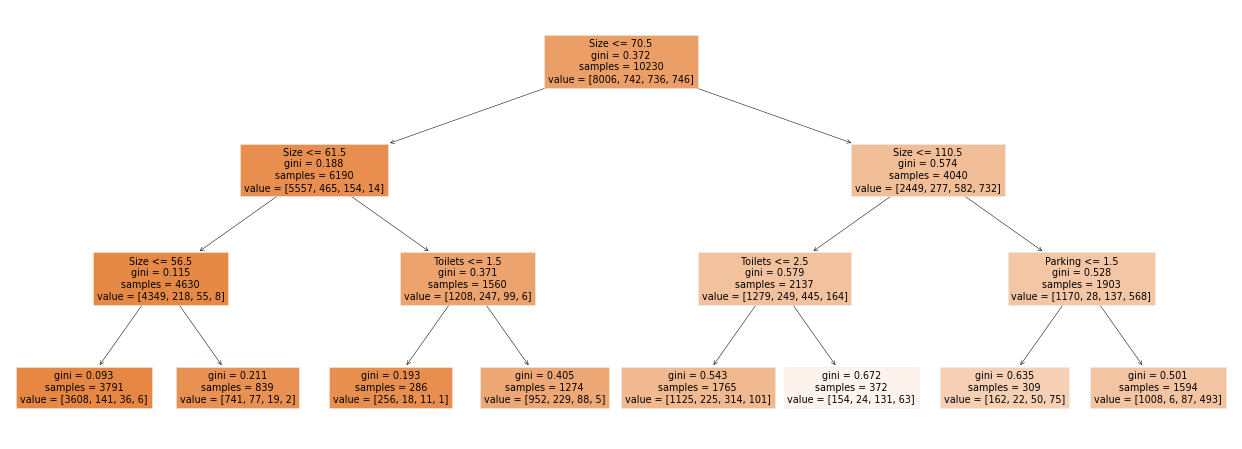

In [ ]:
plt.figure(figsize=(22,8))
plot_tree(decision_tree=DecisionTreeModel, feature_names=explicativas.columns, filled=True);

In [ ]:
#CALCULAR PREDICCION

In [ ]:
a=X_test.sample()

In [ ]:
a

,Rooms,Size,Toilets,Parking
11923,3,96,2,2


### Valor/Samples 

In [ ]:
3608/3791

0.9517277763123186

In [ ]:
141/3791

0.03719335267739383

In [ ]:
36/3791

0.00949617515167502

In [ ]:
6/3791

0.0015826958586125032

In [ ]:
DecisionTreeModel.predict_proba(a)

array([[0.63739377, 0.12747875, 0.17790368, 0.0572238 ]])

In [ ]:
y_pred = DecisionTreeModel.predict(X_train)

In [ ]:
#Interpretar el modelo

In [ ]:
import seaborn as sns

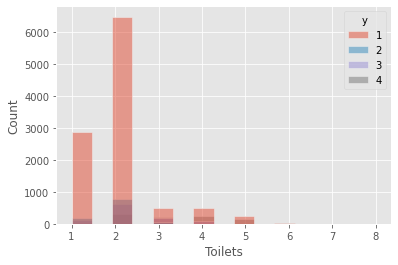

In [ ]:
sns.histplot(x=pd_dataframe.Toilets, hue=pd_dataframe.y)

In [ ]:
# Como de bueno es el Modelo

In [ ]:
pd_dataframe['pred'] = objetivo

In [ ]:
pd_dataframe.sample(10)[['y','pred']]

,y,pred
12460,3,3
13621,3,3
12287,4,4
5002,4,4
5080,4,4
8937,4,4
11903,1,1
10272,1,1
11636,1,1
7977,1,1


In [ ]:
(pd_dataframe['y']==pd_dataframe['pred']).sum()

13640

In [ ]:
(pd_dataframe['y']==pd_dataframe['pred']).mean()

1.0

In [ ]:
(pd_dataframe['y']==pd_dataframe['pred']).sum()/13640

1.0

...y si variamos la profundidad del modelo anterior?



In [ ]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 5)
DecisionTreeModel.fit(X_train,y_train)
y_predict = DecisionTreeModel.predict(X_test)
dt3 = accuracy_score(y_test, y_predict)
dt3

0.7762463343108504

#Modelo de Aprendizaje Simple... SAO-PAULO-PROPERTIES


Probamos con RANDOM FOREST RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)


In [ ]:
RandomForestModel.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=3, min_samples_split=20,
                       n_estimators=500, random_state=10)

In [ ]:
y_predict = RandomForestModel.predict(X_test)


In [ ]:
rf = accuracy_score(y_test,y_predict)
rf

0.7818181818181819

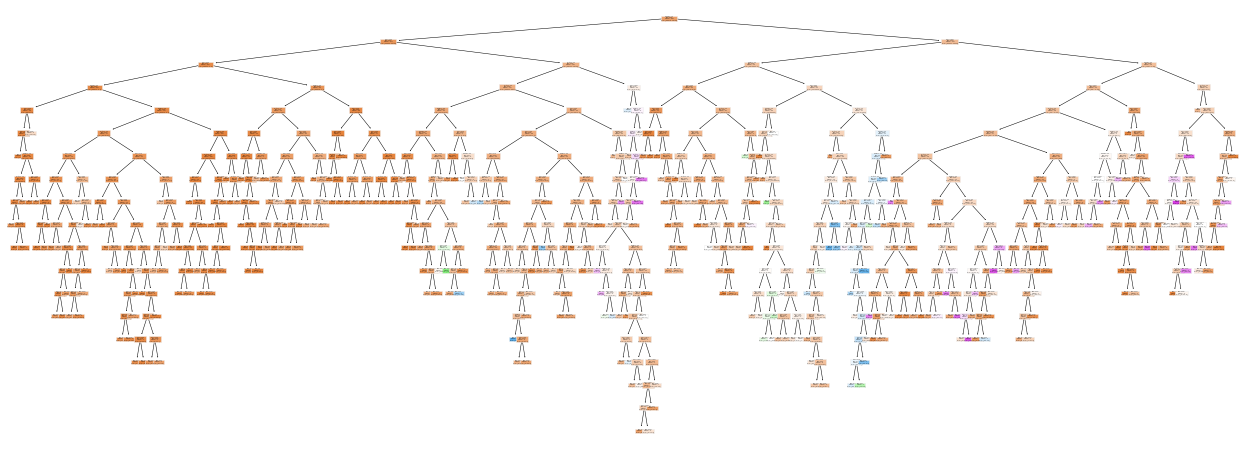

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
estimator = RandomForestModel.estimators_[0]
plt.figure(figsize=(22,8))
plot_tree(decision_tree=estimator, feature_names=explicativas.columns, filled=True);

In [ ]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=explicativas.columns,class_names=['1','2','3','4'],impurity=False,filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'])



0

In [ ]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})

In [ ]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [ ]:
importances.head(9)


,importance
feature,
Size,0.675398
Parking,0.139550
Toilets,0.105651
Rooms,0.079401


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

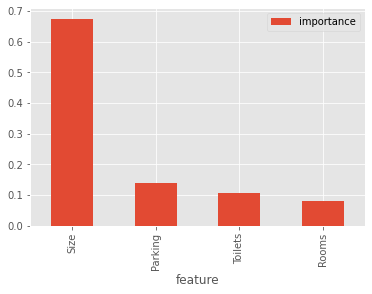

In [ ]:
importances.plot.bar()

#Modelo de SVM SAO-PAULO-PROPERTIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importando el DataSet

In [ ]:
pd_dataframe, dataset_torch = read_dataset()





EDA

In [ ]:
pd_dataframe.shape

(13640, 5)

In [ ]:
pd_dataframe.head()

,Rooms,Size,Toilets,Parking,y
0,2,47,2,1,1
1,2,45,2,1,1
2,2,48,2,1,1
3,2,48,2,1,1
4,2,55,2,1,1


In [ ]:
explicativas = pd_dataframe.drop(columns='y')
objetivo = pd_dataframe.y

Preprocesamiento:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(explicativas,objetivo, test_size = 0.20)

Entrenando el Algoritmo:

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

Haciendo las predicciones :

In [ ]:
y_pred = svclassifier.predict(X_test)

Evaluación del Algoritmo y Resultados

Los resultados de la Evaluación son :

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2127    0    0    0]
 [ 200    0    0    0]
 [ 208    0    0    0]
 [ 193    0    0    0]]
              precision    recall  f1-score   support

           1       0.78      1.00      0.88      2127
           2       0.00      0.00      0.00       200
           3       0.00      0.00      0.00       208
           4       0.00      0.00      0.00       193

    accuracy                           0.78      2728
   macro avg       0.19      0.25      0.22      2728
weighted avg       0.61      0.78      0.68      2728



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Modelo KERNEL SVM SAO-PAULO-PROPERTIES



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pd_dataframe, dataset_torch = read_dataset()

In [ ]:
explicativas = pd_dataframe.drop(columns='y')
objetivo = pd_dataframe.y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(explicativas,objetivo, test_size = 0.20)

1. Gaussian Kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2136    0    0    0]
 [ 203    0    0    0]
 [ 191    0    0    0]
 [ 198    0    0    0]]
              precision    recall  f1-score   support

           1       0.78      1.00      0.88      2136
           2       0.00      0.00      0.00       203
           3       0.00      0.00      0.00       191
           4       0.00      0.00      0.00       198

    accuracy                           0.78      2728
   macro avg       0.20      0.25      0.22      2728
weighted avg       0.61      0.78      0.69      2728



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Sigmoid Kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2136    0    0    0]
 [ 203    0    0    0]
 [ 191    0    0    0]
 [ 198    0    0    0]]
              precision    recall  f1-score   support

           1       0.78      1.00      0.88      2136
           2       0.00      0.00      0.00       203
           3       0.00      0.00      0.00       191
           4       0.00      0.00      0.00       198

    accuracy                           0.78      2728
   macro avg       0.20      0.25      0.22      2728
weighted avg       0.61      0.78      0.69      2728



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Polynomial Kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=2)
svclassifier.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2129    0    0    0]
 [ 196    0    0    0]
 [ 209    0    0    0]
 [ 194    0    0    0]]
              precision    recall  f1-score   support

           1       0.78      1.00      0.88      2129
           2       0.00      0.00      0.00       196
           3       0.00      0.00      0.00       209
           4       0.00      0.00      0.00       194

    accuracy                           0.78      2728
   macro avg       0.20      0.25      0.22      2728
weighted avg       0.61      0.78      0.68      2728



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Compuertas XOR

Tenemos dos entradas binarias (1 ó 0) y la salida será 1 sólo si una de las entradas es verdadera (1) y la otra falsa (0).

De cuatro combinaciones posibles, sólo dos tienen salida 1 y las otras dos serán 0:

    XOR(0,0) = 0
    XOR(0,1) = 1
    XOR(1,0) = 1
    XOR(1,1) = 0

In [ ]:
# carga de librerías
from keras.models import Sequential
from keras.layers.core import Dense

In [ ]:
# creamos los arrays de entrada y salida
# cargamos las 4 combinaciones de las compuertas XOR
explicativas = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
 
# resultados que se obtienen, en el mismo orden
objetivo = np.array([[0],[1],[1],[0]], "float32")

In [ ]:
# creamos la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# entrenamos la red
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
	
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [ ]:
# resultados del entrenamiento
model.fit(explicativas, objetivo, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.2753 - binary_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.2745 - binary_accuracy: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2736 - binary_accuracy: 0.2500
Epoch 4/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2727 - binary_accuracy: 0.2500
Epoch 5/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.2719 - binary_accuracy: 0.2500
Epoch 6/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.2710 - binary_accuracy: 0.2500
Epoch 7/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2702 - binary_accuracy: 0.2500
Epoch 8/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2694 - binary_accuracy: 0.2500
Epoch 9/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2686 - binary_accuracy: 0.2500
Epoch 10/1000
1/1 [=============================

La primer iteración detcetó la mitad de las salidas (0.5) pero a partir de la segunda, sólo acierta 1 de cada 4 (0.25). Más adelante en la “epoch” 107 recupera el 0.5 de aciertos, y pasa a 0.75

In [ ]:
# Evaluamos y Predecimos
scores = model.evaluate(explicativas, objetivo)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 [==============================] - 0s 255ms/step - loss: 0.0343 - binary_accuracy: 1.0000

binary_accuracy: 100.00%


In [ ]:
# con un 100% de precisión hacemos las 4 predicciones posibles de XOR, pasando nuestras entradas

print (model.predict(explicativas).round())

[[0.]
 [1.]
 [1.]
 [0.]]
